In [44]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Summary Statistics

Summary statistics are the numbers that summarize properties of the data. Summarized properties include frequency, location, and spread. Most summary statistics can be calculated in a single pass through the data. There are multiple ways to obtain summary statistics for your data in Python. Below, we will demonstrate how to do so using pandas and NumPy. First, we import both of these libraries:

In [45]:
import pandas as pd
import numpy as np

Next, we generate two illustrative datasets from which we can generate summary statistics:

In [46]:
# Defines an n-dimensional array (ndarray) with 10,000 random numbers in the range [0-500).
values1 = np.random.randint(500, size=10000) 

# Defines a pandas Series similar to the above ndarray.
values2 = pd.Series(np.random.randint(500, size=10000)) 

pandas series are implemented as labeled ndarrays, and hence all statistical methods available for ndarrays can be used with this data structure as well. Below, see the first 10 elements generated for each list of values (note the explicit indexing displayed in the pandas series):

In [47]:
values1[:10]

array([169,  92, 158, 322, 193, 359, 136, 188, 457, 215])

In [48]:
values2[-10:]

9990     99
9991     58
9992    176
9993    192
9994    237
9995    202
9996    252
9997     23
9998    340
9999    287
dtype: int64

Built-in methods are available for all basic statistics. Some are demonstrated below:

In [49]:
print ('MIN(values1) = ' + str(values1.min()) + '\t\t\tMIN(values2) = ' + str(values2.min())) # minimum value in the list
print ('MAX(values1) = ' + str(values1.max()) + '\t\t\tMAX(values2) = ' + str(values2.max())) # maximum value
print ('RANGE(values1) = ' + str(values1.ptp()) + '\t\t\tRANGE(values2) = ' + str(values2.ptp())) # the range of the values
print ('MEAN(values1) = ' + str(values1.mean()) + '\t\tMEAN(values2) = ' + str(values2.mean())) # the mean of the values
print ('STD(values1) = ' + str(values1.std()) + '\t\tSTD(values2) = ' + str(values2.std())) # the standard deviation of the values
print ('VARIANCE(values1) = ' + str(values1.var()) + '\tVARIANCE(values2) = ' + str(values2.var())) # the variance of 

MIN(values1) = 0			MIN(values2) = 0
MAX(values1) = 499			MAX(values2) = 499
RANGE(values1) = 499			RANGE(values2) = 499
MEAN(values1) = 248.3313		MEAN(values2) = 250.3582
STD(values1) = 144.637575824		STD(values2) = 144.29736957355317
VARIANCE(values1) = 20920.0283403	VARIANCE(values2) = 20821.730865846584


Additionally, pandas series have a method called *describe()* that returns a nice summary of these basic statistics.

In [50]:
values2.describe()

count    10000.00000
mean       250.35820
std        144.29737
min          0.00000
25%        125.00000
50%        252.00000
75%        374.00000
max        499.00000
dtype: float64

For non-numerical series objects, *describe()* will return a simple summary of the number of unique values and most frequently occurring ones.

In [51]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])

In [52]:
s

0      a
1      a
2      b
3      b
4      a
5      a
6    NaN
7      c
8      d
9      a
dtype: object

In [53]:
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

*np.nan* is used to denote missing values. By default, the statistical methods implemented in pandas skip these values, which is not always the case when we are dealing with ndarrays. This behavior can be altered by including the *skipna=False* flag when calling a method.

## Handling missing data with pandas

pandas has great support for missing data. For full documentation, [check this page](http://pandas.pydata.org/pandas-docs/dev/missing_data.html). Below are a few examples of how to work with missing data using pandas. First, we create a pandas DataFrame with 5 rows and 3 columns and fill it with random numbers:

In [54]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])

In [55]:
df

,one,two,three
a,-0.972684,1.509997,0.925310
c,0.425061,0.490126,1.087708
e,0.652881,-0.695819,2.454912
f,0.600475,2.557450,0.168900
h,1.353201,0.727226,1.612528


Next, we add two more columns, named 'four' and 'five':

In [56]:
df['four'] = 'bar'
df['five'] = df['one'] > 0

In [57]:
df

,one,two,three,four,five
a,-0.972684,1.509997,0.925310,bar,False
c,0.425061,0.490126,1.087708,bar,True
e,0.652881,-0.695819,2.454912,bar,True
f,0.600475,2.557450,0.168900,bar,True
h,1.353201,0.727226,1.612528,bar,True


Adding new rows is also simple. Below we include three extra empty rows:

In [58]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,-0.972684,1.509997,0.925310,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,0.425061,0.490126,1.087708,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,0.652881,-0.695819,2.454912,bar,True
f,0.600475,2.557450,0.168900,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,1.353201,0.727226,1.612528,bar,True


In [59]:
#This is one way to index a column in pandas
df2['one']

a   -0.972684
b         NaN
c    0.425061
d         NaN
e    0.652881
f    0.600475
g         NaN
h    1.353201
Name: one, dtype: float64

In [60]:
#This is one way to index a row in pandas
df2.loc['a']

one     -0.972684
two          1.51
three     0.92531
four          bar
five        False
Name: a, dtype: object

pandas has two functions *isnull()* and *notnull()* that return boolean objects when called.

In [61]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [62]:
pd.notnull(df2['one'])

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

Missing values propagate naturally through arithmetic operations between pandas objects.

In [63]:
a = df[['one','two']]
a.loc[['a','c'],'one'] = float('nan')
a

,one,two
a,NaN,1.509997
c,NaN,0.490126
e,0.652881,-0.695819
f,0.600475,2.557450
h,1.353201,0.727226


In [64]:
b = df[['one','two']]
b

,one,two
a,-0.972684,1.509997
c,0.425061,0.490126
e,0.652881,-0.695819
f,0.600475,2.557450
h,1.353201,0.727226


In [65]:
a * b

,one,two
a,NaN,2.280092
c,NaN,0.240224
e,0.426254,0.484165
f,0.360570,6.540550
h,1.831153,0.528857


In [66]:
a['one'].dropna()

e    0.652881
f    0.600475
h    1.353201
Name: one, dtype: float64

In pandas, summary statistics all account for missing values. 

*   When summing data, NA (missing) values will be treated as zero
*   If the data are all NA, the result will be NA
*   Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

In [67]:
a

,one,two
a,NaN,1.509997
c,NaN,0.490126
e,0.652881,-0.695819
f,0.600475,2.557450
h,1.353201,0.727226


In [68]:
a['one'].sum()

2.6065570588938822

In [69]:
a.mean(1)

a    1.509997
c    0.490126
e   -0.021469
f    1.578962
h    1.040213
dtype: float64

*This is just the bare minimum. pandas has a lot more missing data functionality.*

## Histograms

#### Using pandas

Plotting histograms using pandas is quite straightforward. Using the above *values2* series, we can simply call the *hist()* method.

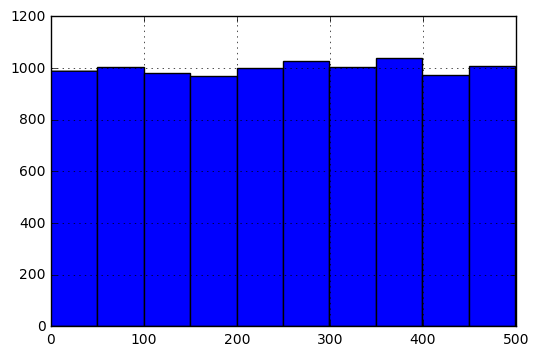

In [84]:
pdhist = values2.hist()

Parameters can be used to change the number of bins, color, transparency, etc.

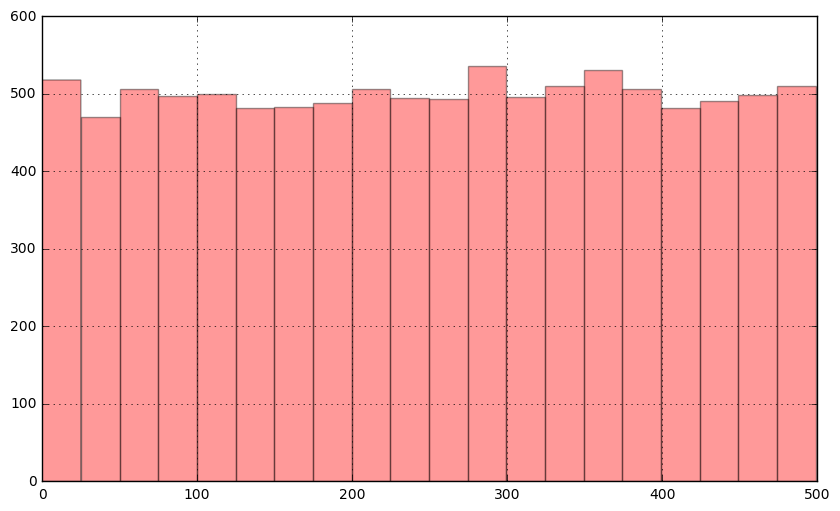

In [71]:
pdhist2 = values2.hist(bins=20, color='r',alpha=0.4, figsize=(10,6))

#### Using NumPy + matplotlib

While the pandas data structure has a method that automatically wraps around a call to the *hist()* method of the plotting library Matplotlib, we can achieve the same result by performing that call manually on our *values1* ndarray.

In [72]:
import matplotlib.pyplot as plt # Required for plotting

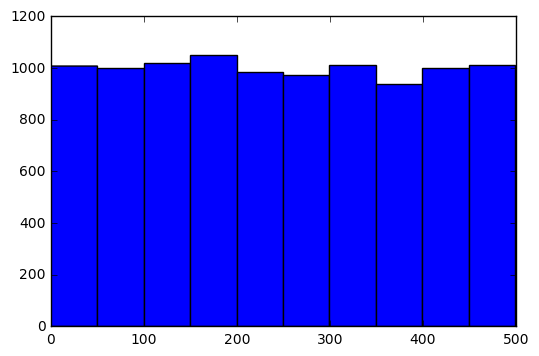

In [73]:
nphist = plt.hist(values1)

## Boxplots

#### Using pandas

pandas DataFrames have a boxplot method that allows you to visualize the distribution of values within each column.

In [74]:
df = pd.DataFrame(rand(10,2), columns=['Col1', 'Col2'] )

In [75]:
df.head()

,Col1,Col2
0,0.869048,0.915978
1,0.059795,0.555290
2,0.398208,0.508211
3,0.117952,0.574079
4,0.624012,0.959538


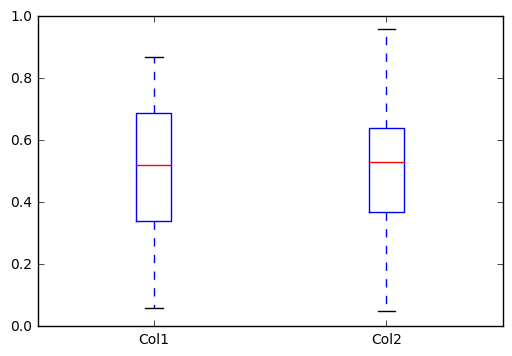

In [76]:
box = df.boxplot(grid=False, return_type='axes')

#### Using NumPy + matplotlib

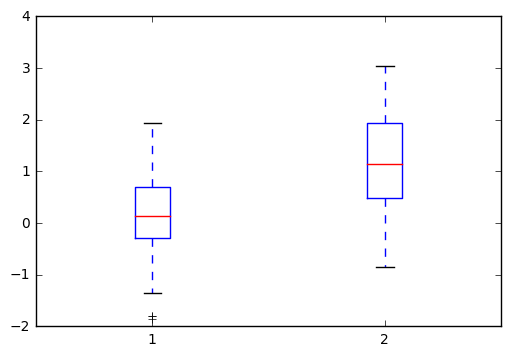

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)

x1 = np.random.normal(0,1,50)
x2 = np.random.normal(1,1,50)

npbox = ax.boxplot([x1,x2])

## Scatterplots

#### Using pandas

Let's define a dataframe containing 2 columns, each with 200 random numbers < 1.

In [78]:
df = pd.DataFrame(rand(200,2))

In [79]:
df.head()

,0,1
0,0.968246,0.040717
1,0.366953,0.412235
2,0.145046,0.880970
3,0.125265,0.075552
4,0.739859,0.353967


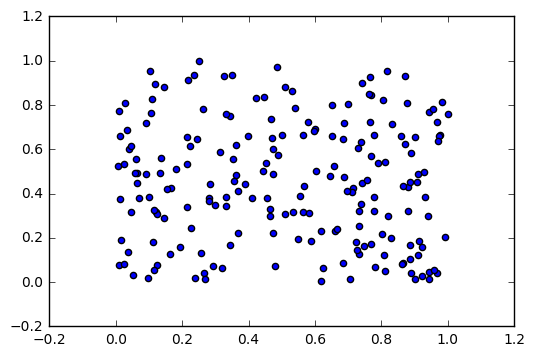

In [80]:
pdscatter = plt.scatter(df[0], df[1])

#### Using NumPy + matplotlib

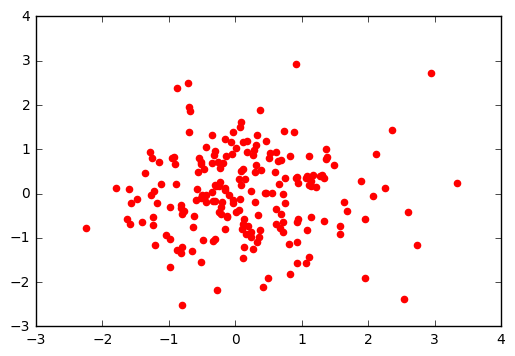

In [81]:
x = np.random.randn(200)
y = np.random.randn(200)

fig = plt.figure()
ax = fig.add_subplot(111)

npscatter = ax.scatter(x,y,color='r')